# Support Vector Machine

In [1]:
import some_load_train_evaluate_functions as ml

from sklearn.svm import LinearSVC

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Diabetes data

diabetes_df = ml.get_data_of_disease(driver, 'Diabetes')
diabetes_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Diabetes
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,1
8889,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8890,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8891,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


In [4]:
svm_classifier = LinearSVC(random_state=42)

## Preprocessing

### Zero Imputation

In [5]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)


Train Accuracy: 0.927

Test Accuracy: 0.925

Precision: 0.868

Recall: 0.529

F1-Score: 0.657

Confusion Matrix:

[[3034   39]
 [ 228  256]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.99      0.96      3073
     Class 1       0.87      0.53      0.66       484

    accuracy                           0.92      3557
   macro avg       0.90      0.76      0.81      3557
weighted avg       0.92      0.92      0.92      3557


ROC-AUC Curve:


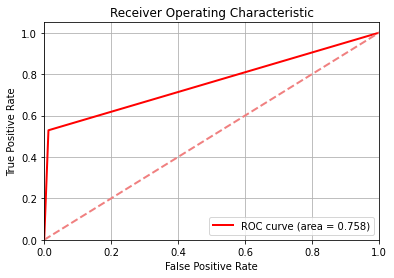

In [6]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)

### Mode Imputation

In [7]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)


Train Accuracy: 0.935

Test Accuracy: 0.934

Precision: 0.891

Recall: 0.591

F1-Score: 0.711

Confusion Matrix:

[[3038   35]
 [ 198  286]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.99      0.96      3073
     Class 1       0.89      0.59      0.71       484

    accuracy                           0.93      3557
   macro avg       0.91      0.79      0.84      3557
weighted avg       0.93      0.93      0.93      3557


ROC-AUC Curve:


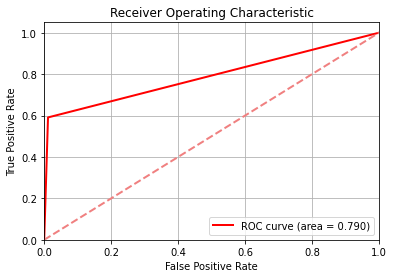

In [8]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)

### k-NN Imputation

In [9]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)


Train Accuracy: 0.930

Test Accuracy: 0.929

Precision: 0.864

Recall: 0.566

F1-Score: 0.684

Confusion Matrix:

[[3030   43]
 [ 210  274]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.99      0.96      3073
     Class 1       0.86      0.57      0.68       484

    accuracy                           0.93      3557
   macro avg       0.90      0.78      0.82      3557
weighted avg       0.93      0.93      0.92      3557


ROC-AUC Curve:


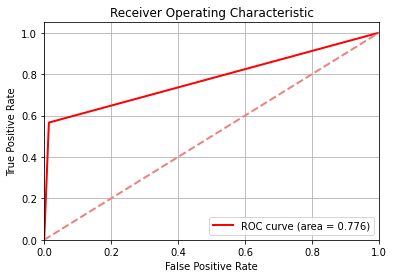

In [10]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)

### Multiple Imputation by Chained Equations (MICE)

In [11]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)


Train Accuracy: 0.929

Test Accuracy: 0.929

Precision: 0.886

Recall: 0.545

F1-Score: 0.675

Confusion Matrix:

[[3039   34]
 [ 220  264]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.99      0.96      3073
     Class 1       0.89      0.55      0.68       484

    accuracy                           0.93      3557
   macro avg       0.91      0.77      0.82      3557
weighted avg       0.93      0.93      0.92      3557


ROC-AUC Curve:


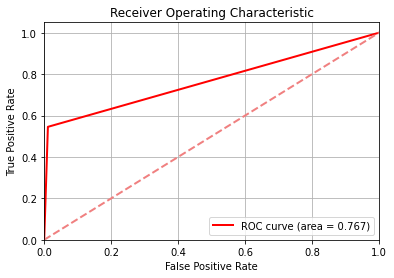

In [12]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)

### Median Imputation

In [13]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)


Train Accuracy: 0.936

Test Accuracy: 0.936

Precision: 0.895

Recall: 0.601

F1-Score: 0.719

Confusion Matrix:

[[3039   34]
 [ 193  291]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.99      0.96      3073
     Class 1       0.90      0.60      0.72       484

    accuracy                           0.94      3557
   macro avg       0.92      0.80      0.84      3557
weighted avg       0.93      0.94      0.93      3557


ROC-AUC Curve:


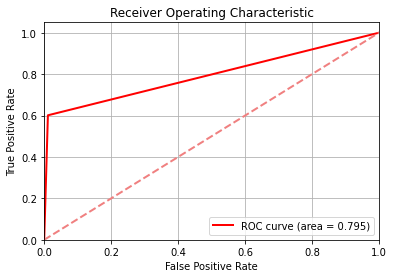

In [14]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)

### Mean Imputation

In [15]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)


Train Accuracy: 0.937

Test Accuracy: 0.938

Precision: 0.902

Recall: 0.612

F1-Score: 0.729

Confusion Matrix:

[[3041   32]
 [ 188  296]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.99      0.97      3073
     Class 1       0.90      0.61      0.73       484

    accuracy                           0.94      3557
   macro avg       0.92      0.80      0.85      3557
weighted avg       0.94      0.94      0.93      3557


ROC-AUC Curve:


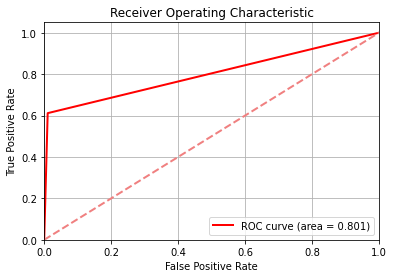

In [16]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)

### Dropping Null Values

In [17]:
# Drop null values
diabetes_df_na = diabetes_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df_na, label = 'Diabetes',
                                                              impute = False, scale=True,
                                                              random_state=42)


Train Accuracy: 0.922

Test Accuracy: 0.927

Precision: 0.928

Recall: 0.831

F1-Score: 0.877

Confusion Matrix:

[[268   8]
 [ 21 103]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.97      0.95       276
     Class 1       0.93      0.83      0.88       124

    accuracy                           0.93       400
   macro avg       0.93      0.90      0.91       400
weighted avg       0.93      0.93      0.93       400


ROC-AUC Curve:


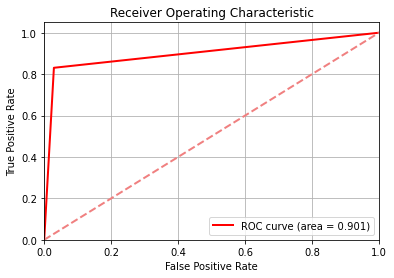

In [18]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)

## Oversampling and Undersampling

### Random Oversampling


Train Accuracy: 0.916

Test Accuracy: 0.907

Precision: 0.837

Recall: 0.871

F1-Score: 0.854

Confusion Matrix:

[[255  21]
 [ 16 108]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.92      0.93       276
     Class 1       0.84      0.87      0.85       124

    accuracy                           0.91       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.91      0.91      0.91       400


ROC-AUC Curve:


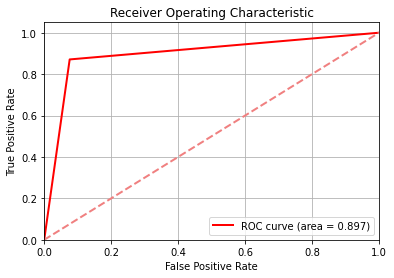

In [19]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

svm_classifier.fit(X_ros, y_ros)

ml.evaluate_model_metrics(svm_classifier,X_ros, y_ros,X_val, y_val)

### SMOTE (Synthetic Minority Over-sampling Technique)


Train Accuracy: 0.926

Test Accuracy: 0.915

Precision: 0.857

Recall: 0.871

F1-Score: 0.864

Confusion Matrix:

[[258  18]
 [ 16 108]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.93      0.94       276
     Class 1       0.86      0.87      0.86       124

    accuracy                           0.92       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.92      0.92      0.92       400


ROC-AUC Curve:


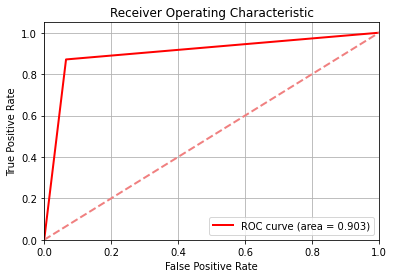

In [20]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

svm_classifier.fit(X_smote, y_smote)

ml.evaluate_model_metrics(svm_classifier,X_smote, y_smote,X_val, y_val)

### Random Undersampling


Train Accuracy: 0.925

Test Accuracy: 0.870

Precision: 0.740

Recall: 0.895

F1-Score: 0.810

Confusion Matrix:

[[237  39]
 [ 13 111]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.95      0.86      0.90       276
     Class 1       0.74      0.90      0.81       124

    accuracy                           0.87       400
   macro avg       0.84      0.88      0.86       400
weighted avg       0.88      0.87      0.87       400


ROC-AUC Curve:


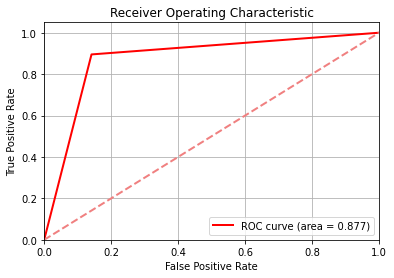

In [21]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

svm_classifier.fit(X_rus, y_rus)

ml.evaluate_model_metrics(svm_classifier,X_rus, y_rus,X_val, y_val)

### Tomek Links


Train Accuracy: 0.920

Test Accuracy: 0.925

Precision: 0.920

Recall: 0.831

F1-Score: 0.873

Confusion Matrix:

[[267   9]
 [ 21 103]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.97      0.95       276
     Class 1       0.92      0.83      0.87       124

    accuracy                           0.93       400
   macro avg       0.92      0.90      0.91       400
weighted avg       0.92      0.93      0.92       400


ROC-AUC Curve:


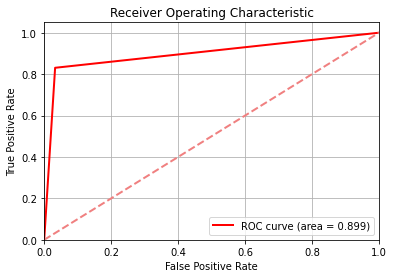

In [22]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

svm_classifier.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(svm_classifier,X_tomek, y_tomek,X_val, y_val)

### SMOTE + Tomek Links


Train Accuracy: 0.924

Test Accuracy: 0.912

Precision: 0.856

Recall: 0.863

F1-Score: 0.859

Confusion Matrix:

[[258  18]
 [ 17 107]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.93      0.94       276
     Class 1       0.86      0.86      0.86       124

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400


ROC-AUC Curve:


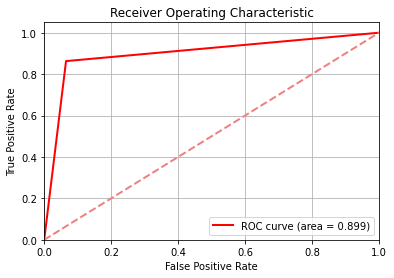

In [23]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

svm_classifier.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(svm_classifier,X_smote_tomek, y_smote_tomek,X_val, y_val)

In [24]:
# Smote + Tomek Links provide best results for SVM

X_train, y_train = X_smote_tomek, y_smote_tomek

## Hyperparameter Optimization 

### Grid Search

In [25]:
param_grid = {
    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2'],
    'dual': [False], 
    'class_weight': [None, 'balanced'] 

}

In [26]:
grid_best_params, svm_classifier_grid = ml.grid_search_optimize(svm_classifier, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [27]:
grid_best_params

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l1'}


Train Accuracy: 0.902

Test Accuracy: 0.912

Precision: 0.894

Recall: 0.815

F1-Score: 0.852

Confusion Matrix:

[[264  12]
 [ 23 101]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.96      0.94       276
     Class 1       0.89      0.81      0.85       124

    accuracy                           0.91       400
   macro avg       0.91      0.89      0.90       400
weighted avg       0.91      0.91      0.91       400


ROC-AUC Curve:


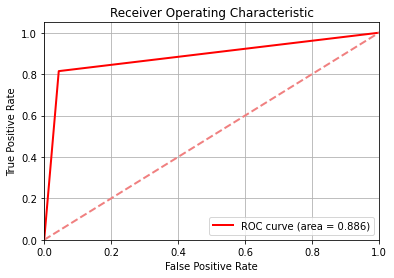

In [28]:
ml.evaluate_model_metrics(svm_classifier_grid,X_train,y_train,X_val,y_val)

### Random Search

In [29]:
rand_best_params, svm_classifier_rand = ml.random_search_optimize(svm_classifier,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [30]:
rand_best_params

{'penalty': 'l1',
 'loss': 'squared_hinge',
 'dual': False,
 'class_weight': None,
 'C': 0.01}


Train Accuracy: 0.902

Test Accuracy: 0.912

Precision: 0.894

Recall: 0.815

F1-Score: 0.852

Confusion Matrix:

[[264  12]
 [ 23 101]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.96      0.94       276
     Class 1       0.89      0.81      0.85       124

    accuracy                           0.91       400
   macro avg       0.91      0.89      0.90       400
weighted avg       0.91      0.91      0.91       400


ROC-AUC Curve:


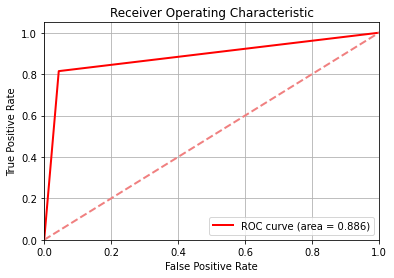

In [31]:
ml.evaluate_model_metrics(svm_classifier_rand,X_train,y_train,X_val,y_val)

### Optuna

In [32]:
def objective(trial):

    C = trial.suggest_loguniform('C', 1e-5, 1e3)
    loss = trial.suggest_categorical('loss', ['hinge', 'squared_hinge'])
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    dual = False
    
    if penalty == 'l1' or penalty == 'l2' and loss == 'hinge':
        raise ml.optuna.TrialPruned()

    model = LinearSVC(C=C, loss=loss, penalty=penalty, class_weight=class_weight, dual=dual, random_state=42)
            
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [33]:
best_trial , svm_classifier_opt = ml.optuna_optimize(objective, LinearSVC, n_trials=150)

In [34]:
best_trial

{'C': 4.528032283843178,
 'loss': 'squared_hinge',
 'penalty': 'l2',
 'class_weight': None}


Train Accuracy: 0.922

Test Accuracy: 0.912

Precision: 0.835

Recall: 0.895

F1-Score: 0.864

Confusion Matrix:

[[254  22]
 [ 13 111]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.95      0.92      0.94       276
     Class 1       0.83      0.90      0.86       124

    accuracy                           0.91       400
   macro avg       0.89      0.91      0.90       400
weighted avg       0.92      0.91      0.91       400


ROC-AUC Curve:


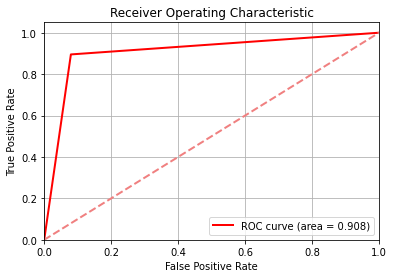

In [35]:
svm_classifier_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(svm_classifier_opt,X_train,y_train,X_val,y_val)

## Cross Validation

### K-fold

In [36]:
ml.k_cross_validate(svm_classifier,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.89108911 0.91       0.92       0.85       0.9        0.84
 0.84       0.89       0.88       0.84      ]

Mean accuracy score:  0.8761089108910891

Standard deviation:  0.029447517029289196


In [37]:
ml.k_cross_validate(svm_classifier_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.91089109 0.93       0.87       0.88       0.89       0.88
 0.88       0.88       0.88       0.86      ]

Mean accuracy score:  0.8860891089108911

Standard deviation:  0.019192412336774517


In [38]:
ml.k_cross_validate(svm_classifier_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.9009901 0.9       0.9       0.83      0.89      0.84      0.84
 0.89      0.84      0.84     ]

Mean accuracy score:  0.8670990099009901

Standard deviation:  0.029455438888425934


### Stratified K-fold

In [39]:
ml.stratified_k_cross_validate(svm_classifier,X,y,n_splits=10)


Average Accuracy: 0.8691089108910891

Average Precision: 0.858220684117514

Average Recall: 0.7355614973262032

Average F1-Score: 0.7880741548909375


In [40]:
ml.stratified_k_cross_validate(svm_classifier_grid,X,y,n_splits=10)


Average Accuracy: 0.8890891089108912

Average Precision: 0.9670198987807683

Average Recall: 0.6909090909090909

Average F1-Score: 0.8043333139358854


In [41]:
ml.stratified_k_cross_validate(svm_classifier_opt,X,y,n_splits=10)


Average Accuracy: 0.8691188118811881

Average Precision: 0.8454240673994567

Average Recall: 0.7475935828877006

Average F1-Score: 0.79118892633748


## Feature Selection

### Correlation Analysis

In [42]:
svm_classifier_test = LinearSVC(random_state=42)

In [43]:
pos_corr, neg_corr = ml.get_correlated_features(diabetes_df,'Diabetes',pos=0.1,neg=-0.1)

corr_features = ['Gender'] + list(pos_corr.keys()[1:10]) + list(neg_corr.keys()[:10]) 


Train Accuracy: 0.897

Test Accuracy: 0.897

Precision: 0.817

Recall: 0.863

F1-Score: 0.839

Confusion Matrix:

[[252  24]
 [ 17 107]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.91      0.92       276
     Class 1       0.82      0.86      0.84       124

    accuracy                           0.90       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.90      0.90      0.90       400


ROC-AUC Curve:


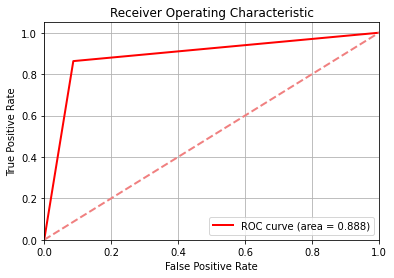

In [44]:
ml.evaluate_feature_set(corr_features, svm_classifier_test, X_train, y_train, X_val, y_val)

### SelectFromModel

In [45]:
sfm_features = ml.select_from_model_features(svm_classifier_test,X,y)
sfm_features

['Gender',
 'A/G Ratio',
 'Blood Urea Nitrogen [mg/dL]',
 'Cis-beta-carotene [umol/L]',
 'Fasting Glucose [mmol/L]',
 'Glycohemoglobin [%]',
 'Hematocrit [%]',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'LDL_HDL Ratio',
 'Mean Cell Hgb Conc. [g/dL]',
 'Mean cell hemoglobin [pg]',
 'Mean cell volume [fL]',
 'Neutrophil_Lymphocyte Ratio',
 'Non_HDL Ratio',
 'Osmolality [mmol/Kg]',
 'RBC count [million cells/uL]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholesterol [mmol/L]',
 'Total Cholestrol_HDL Ratio',
 'Trans-beta-carotene [umol/L]',
 'UIBC [umol/L]',
 'Hemoglobin [g/dL]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Triglyceride [mmol/L]']


Train Accuracy: 0.905

Test Accuracy: 0.902

Precision: 0.835

Recall: 0.855

F1-Score: 0.845

Confusion Matrix:

[[255  21]
 [ 18 106]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.92      0.93       276
     Class 1       0.83      0.85      0.84       124

    accuracy                           0.90       400
   macro avg       0.88      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400


ROC-AUC Curve:


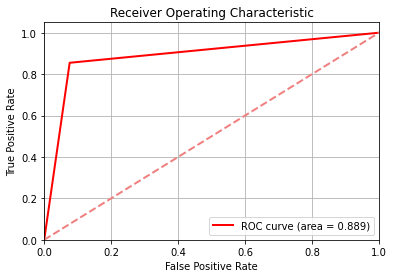

In [46]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, svm_classifier_test, X_train, y_train, X_val, y_val)

### SelectKBest

In [47]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

array(['Glycohemoglobin [%]', 'Fasting Glucose [mmol/L]',
       'Osmolality [mmol/Kg]', 'Direct HDL-Cholesterol [mmol/L]',
       'Total Cholesterol [mmol/L]', 'Insulin [pmol/L]',
       'Blood Urea Nitrogen [mg/dL]', 'BMI',
       'LDL-Cholesterol(NIH2) [mmol/L]', 'Chloride [mmol/L]', 'Age',
       'Triglyceride_HDL Ratio', 'Platelet_WBC Ratio',
       'Triglyceride [mmol/L]', 'Non_HDL Ratio', 'Retinol [umol/L]',
       'Alpha-crypotoxanthin [umol/L]', 'Ferritin [ng/mL]',
       'Trans-beta-carotene [umol/L]', 'Cis-beta-carotene [umol/L]',
       'Transferrin Saturation [%]',
       'White blood cell count [1000 cells/uL]', 'UIBC [umol/L]',
       'Alanine Aminotransferase [U/L]', 'Total Lycopene [umol/L]',
       'Creatinine [mg/dL]', 'Iron frozen [umol/L]',
       'Trans-lycopene [umol/L]', 'Iron [ug/dL]',
       'Alpha-carotene [umol/L]'], dtype=object)


Train Accuracy: 0.905

Test Accuracy: 0.905

Precision: 0.826

Recall: 0.879

F1-Score: 0.852

Confusion Matrix:

[[253  23]
 [ 15 109]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.92      0.93       276
     Class 1       0.83      0.88      0.85       124

    accuracy                           0.91       400
   macro avg       0.88      0.90      0.89       400
weighted avg       0.91      0.91      0.91       400


ROC-AUC Curve:


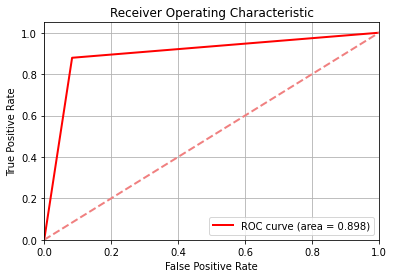

In [48]:
k_best_features_ = list(k_best_features[:30]) + ['Gender']

ml.evaluate_feature_set(k_best_features_, svm_classifier_test, X_train, y_train, X_val, y_val)

### Recursive Feature Elimination (RFE) 

In [49]:
rfe_features = ml.select_rfe_features(svm_classifier_test,X,y,n=30,step=0.5)
rfe_features[:30]

array(['Gender', 'Iron [ug/dL]', 'Iron frozen [umol/L]', 'LDL_HDL Ratio',
       'Mean Cell Hgb Conc. [g/dL]', 'Mean cell hemoglobin [pg]',
       'Mean cell volume [fL]', 'Neutrophil_Lymphocyte Ratio',
       'Non_HDL Ratio', 'Osmolality [mmol/Kg]', 'Potassium [mmol/L]',
       'RBC count [million cells/uL]', 'Retinol [umol/L]',
       'Retinyl palmitate [umol/L]', 'Sodium [mmol/L]',
       'Systemic Immune‐inflammation Index (SII)',
       'Total Cholestrol_HDL Ratio',
       'Total Iron Binding Capacity [umol/L]',
       'Trans-beta-carotene [umol/L]', 'UIBC [umol/L]',
       'Hemoglobin [g/dL]', 'LDL-Cholesterol(NIH2) [mmol/L]',
       'Hematocrit [%]', 'Glycohemoglobin [%]', 'Triglyceride [mmol/L]',
       'Cis-beta-carotene [umol/L]', 'Fasting Glucose [mmol/L]',
       'Blood Urea Nitrogen [mg/dL]', 'Globulin [g/dL]', 'A/G Ratio'],
      dtype=object)


Train Accuracy: 0.904

Test Accuracy: 0.905

Precision: 0.841

Recall: 0.855

F1-Score: 0.848

Confusion Matrix:

[[256  20]
 [ 18 106]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.93      0.93       276
     Class 1       0.84      0.85      0.85       124

    accuracy                           0.91       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.91      0.91      0.91       400


ROC-AUC Curve:


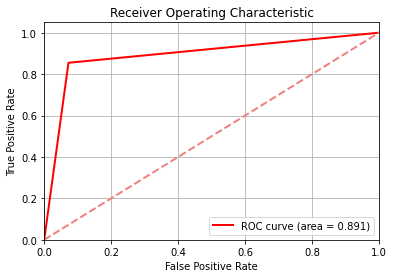

In [50]:
rfe_features_ = list(rfe_features[:30])

ml.evaluate_feature_set(rfe_features_, svm_classifier_test, X_train, y_train, X_val, y_val)

### Lasso Regularization

In [51]:
# Uses lasso regularization in the LinearSVC model to give more weights to more important features

def svc_lasso_select(X_train, y_train, C=1):

    svc = LinearSVC(penalty='l1', C=C, dual=False, random_state=42)
    svc.fit(X_train, y_train)

    # Get feature importance coefficients from the SVM model
    feature_importance = svc.coef_[0]

    feature_importance_pairs = [(feature, importance) for feature, importance in zip(X.columns, feature_importance)]
    feature_importance_pairs.sort(key=lambda x: abs(x[1]), reverse=True)

    sorted_features = [feature for feature, _ in feature_importance_pairs]

    return sorted_features

In [52]:
l1_selected_features = svc_lasso_select(X_train, y_train, C=0.5)
l1_selected_features[:30]

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Osmolality [mmol/Kg]',
 'Iron frozen [umol/L]',
 'Iron [ug/dL]',
 'Sodium [mmol/L]',
 'Cis-beta-carotene [umol/L]',
 'Trans-beta-carotene [umol/L]',
 'Mean cell volume [fL]',
 'Hemoglobin [g/dL]',
 'Retinyl palmitate [umol/L]',
 'Gender',
 'RBC count [million cells/uL]',
 'Triglyceride_HDL Ratio',
 'Platelet_WBC Ratio',
 'Blood cadmium [nmol/L]',
 'Uric Acid [mg/dL]',
 'Triglyceride [mmol/L]',
 'Cotinine [ng/mL]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Retinol [umol/L]',
 'Beta-cryptoxanthin [umol/L]',
 'Aspartate Aminotransferase [U/L]',
 'Mean Cell Hgb Conc. [g/dL]',
 'BMI',
 'Platelet_Lymphocyte Ratio',
 'Neutrophil_Lymphocyte Ratio',
 'Total Protein [g/dL]',
 'Transferrin receptor [nmol/L]',
 'Platelet count [1000 cells/uL]']


Train Accuracy: 0.911

Test Accuracy: 0.907

Precision: 0.843

Recall: 0.863

F1-Score: 0.853

Confusion Matrix:

[[256  20]
 [ 17 107]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.93      0.93       276
     Class 1       0.84      0.86      0.85       124

    accuracy                           0.91       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.91      0.91      0.91       400


ROC-AUC Curve:


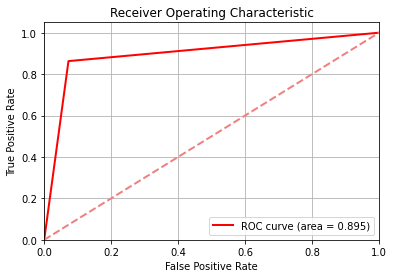

In [53]:
l1_selected_features_ = list(l1_selected_features[:30]) 

ml.evaluate_feature_set(l1_selected_features_, svm_classifier_test, X_train, y_train, X_val, y_val)

### Relief F

In [54]:
relieff_features = ml.relief_feature_select(30,X,y)

In [55]:
relieff_features_ = relieff_features[:30]
relieff_features_

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Total Cholesterol [mmol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Triglyceride_HDL Ratio',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Nucleated RBCs',
 'Non_HDL Ratio',
 'Triglyceride [mmol/L]',
 'Age',
 'Osmolality [mmol/Kg]',
 'Insulin [pmol/L]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Chloride [mmol/L]',
 'LDL_HDL Ratio',
 'Alanine Aminotransferase [U/L]',
 'Total Cholestrol_HDL Ratio',
 'UIBC [umol/L]',
 'Gender',
 'Alpha-tocopherol [umol/L]',
 'Uric Acid [mg/dL]',
 'Total Calcium [mg/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Aspartate Aminotransferase [U/L]',
 'Ferritin [ng/mL]']


Train Accuracy: 0.910

Test Accuracy: 0.915

Precision: 0.863

Recall: 0.863

F1-Score: 0.863

Confusion Matrix:

[[259  17]
 [ 17 107]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.94      0.94       276
     Class 1       0.86      0.86      0.86       124

    accuracy                           0.92       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.92      0.92      0.92       400


ROC-AUC Curve:


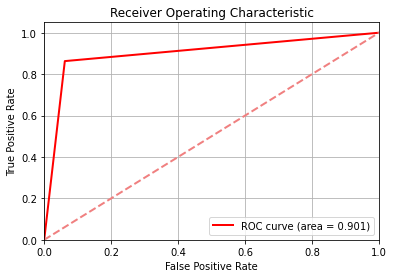

In [56]:
relieff_features_list = list(relieff_features_)

ml.evaluate_feature_set(relieff_features_list, svm_classifier_test, X_train, y_train, X_val, y_val)

### Ensemble of Feature Sets

In [57]:
# We can also create a feature set from the above sets by selecting commonly occuring features

list1 = list(corr_features)
list2 = list(k_best_features_)
list3 = list(sfm_features)
list4 = list(rfe_features_)
list5 = list(l1_selected_features_)
list6 = list(relieff_features_)

combined_list = list1 + list2 + list3 + list4 + list5 + list6
feature_counts = ml.Counter(combined_list)
min_count = 3

combined_features = [feature for feature, count in feature_counts.items() if count >= min_count]
# combined_features = [x for x in relieff_features if x in combined_features]     # order based on releif features
combined_features

['Gender',
 'Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Insulin [pmol/L]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Triglyceride [mmol/L]',
 'A/G Ratio',
 'Chloride [mmol/L]',
 'Platelet_WBC Ratio',
 'Direct HDL-Cholesterol [mmol/L]',
 'Total Cholesterol [mmol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Triglyceride_HDL Ratio',
 'Non_HDL Ratio',
 'Trans-beta-carotene [umol/L]',
 'Cis-beta-carotene [umol/L]',
 'UIBC [umol/L]',
 'Iron frozen [umol/L]',
 'Iron [ug/dL]',
 'Hematocrit [%]',
 'LDL_HDL Ratio',
 'Mean Cell Hgb Conc. [g/dL]',
 'Mean cell volume [fL]',
 'Neutrophil_Lymphocyte Ratio',
 'RBC count [million cells/uL]',
 'Sodium [mmol/L]',
 'Total Cholestrol_HDL Ratio',
 'Hemoglobin [g/dL]']


Train Accuracy: 0.911

Test Accuracy: 0.907

Precision: 0.837

Recall: 0.871

F1-Score: 0.854

Confusion Matrix:

[[255  21]
 [ 16 108]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.92      0.93       276
     Class 1       0.84      0.87      0.85       124

    accuracy                           0.91       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.91      0.91      0.91       400


ROC-AUC Curve:


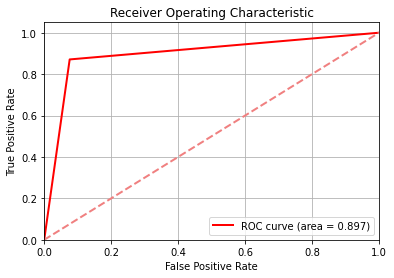

In [58]:
ml.evaluate_feature_set(combined_features, svm_classifier_test, X_train, y_train, X_val, y_val)


Maximum accuracy = 0.9011 for 29 features


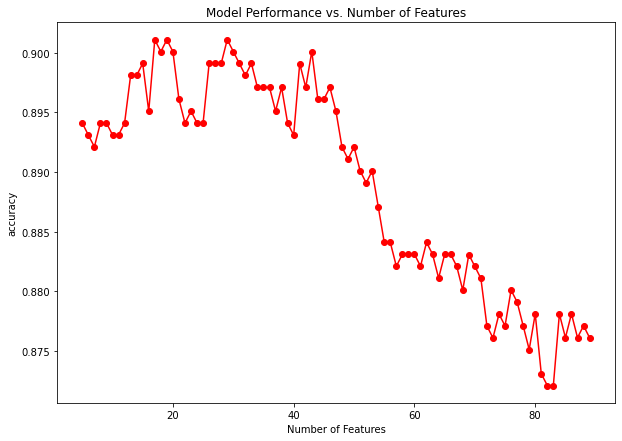

In [59]:
# Optimal no. of features

final_features = list(relieff_features) 

ml.plot_num_feature_performance(svm_classifier_test,  X, y, final_features, scoring='accuracy')


Maximum f1 = 0.8387 for 17 features


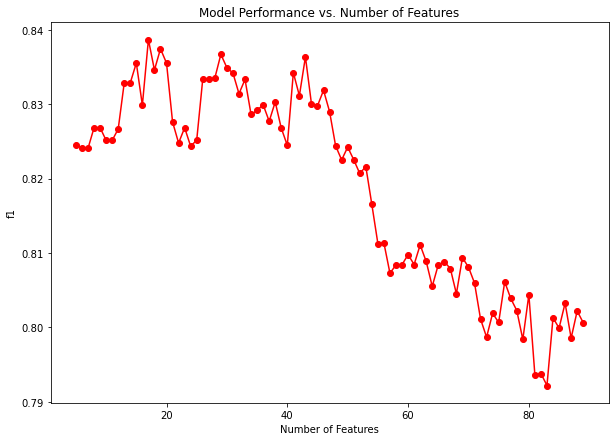

In [60]:
# Optimal no. of features

final_features = list(relieff_features) 

ml.plot_num_feature_performance(svm_classifier_test,  X, y, final_features, scoring='f1')


Maximum precision = 0.9273 for 29 features


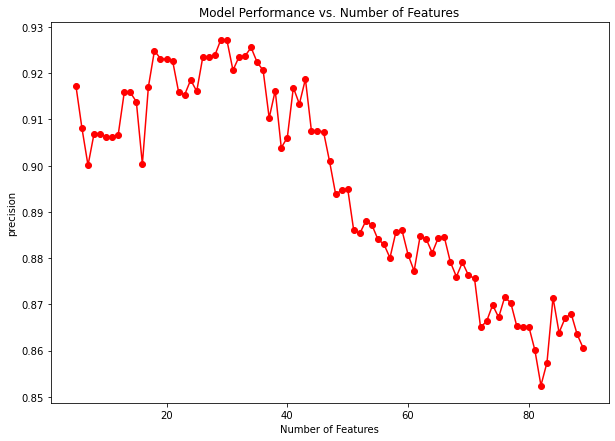

In [61]:
# Optimal no. of features

final_features = list(relieff_features) 

ml.plot_num_feature_performance(svm_classifier_test,  X, y, final_features, scoring='precision')


Maximum recall = 0.7749 for 17 features


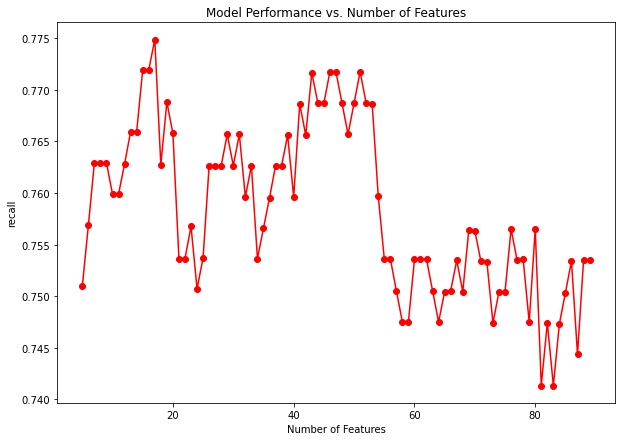

In [62]:
# Optimal no. of features

final_features = list(relieff_features) 

ml.plot_num_feature_performance(svm_classifier_test,  X, y, final_features, scoring='recall')


Train Accuracy: 0.898

Test Accuracy: 0.897

Precision: 0.864

Recall: 0.832

F1-Score: 0.848

Confusion Matrix:

[[245  18]
 [ 23 114]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92       263
     Class 1       0.86      0.83      0.85       137

    accuracy                           0.90       400
   macro avg       0.89      0.88      0.89       400
weighted avg       0.90      0.90      0.90       400


ROC-AUC Curve:


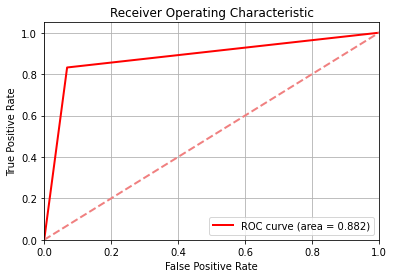

In [63]:
selected = relieff_features[:17]

X = X[selected]
X_train = X_train[selected]
X_test = X_test[selected]

svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier, X_train, y_train, X_test, y_test)

In [64]:
grid_best_params, svm_classifier_grid = ml.grid_search_optimize(svm_classifier, param_grid, X_train, y_train, cv=10)
grid_best_params

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l1'}


Train Accuracy: 0.901

Test Accuracy: 0.905

Precision: 0.930

Recall: 0.781

F1-Score: 0.849

Confusion Matrix:

[[255   8]
 [ 30 107]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.89      0.97      0.93       263
     Class 1       0.93      0.78      0.85       137

    accuracy                           0.91       400
   macro avg       0.91      0.88      0.89       400
weighted avg       0.91      0.91      0.90       400


ROC-AUC Curve:


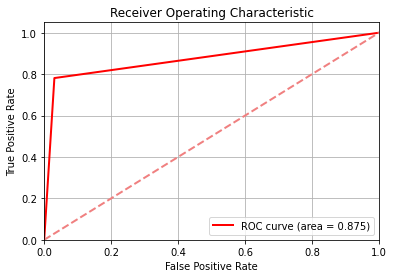

In [65]:
svm_classifier_grid.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier_grid,X_train,y_train,X_test,y_test)

In [66]:
# Hyperparameter Optimize

best_trial, svm_classifier_opt = ml.optuna_optimize(objective,LinearSVC, n_trials=100)

best_trial

{'C': 0.9563282611323483,
 'loss': 'squared_hinge',
 'penalty': 'l2',
 'class_weight': None}


Train Accuracy: 0.899

Test Accuracy: 0.897

Precision: 0.864

Recall: 0.832

F1-Score: 0.848

Confusion Matrix:

[[245  18]
 [ 23 114]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92       263
     Class 1       0.86      0.83      0.85       137

    accuracy                           0.90       400
   macro avg       0.89      0.88      0.89       400
weighted avg       0.90      0.90      0.90       400


ROC-AUC Curve:


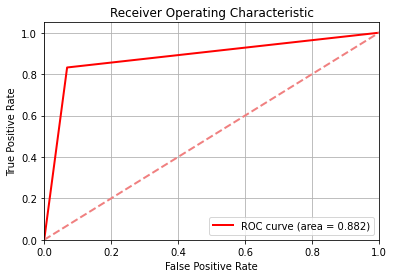

In [67]:
svm_classifier_opt.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier_opt,X_train,y_train,X_test,y_test)

In [68]:
# Cross-validation

ml.k_cross_validate(svm_classifier,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.91089109 0.93       0.91       0.89       0.9        0.92
 0.88       0.93       0.87       0.87      ]

Mean accuracy score:  0.901089108910891

Standard deviation:  0.021695055288660645


In [69]:
ml.stratified_k_cross_validate(svm_classifier,X,y,n_splits=10,random_state=42)


Average Accuracy: 0.897079207920792

Average Precision: 0.9111804209557752

Average Recall: 0.768716577540107

Average F1-Score: 0.8315399385560674


In [70]:
ml.k_cross_validate(svm_classifier_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.91089109 0.93       0.87       0.88       0.89       0.88
 0.88       0.88       0.88       0.86      ]

Mean accuracy score:  0.8860891089108911

Standard deviation:  0.019192412336774517


In [71]:
ml.stratified_k_cross_validate(svm_classifier_grid,X,y,n_splits=10,random_state=42)


Average Accuracy: 0.889089108910891

Average Precision: 0.9671865654474349

Average Recall: 0.6908199643493761

Average F1-Score: 0.8044502046430742


In [72]:
ml.k_cross_validate(svm_classifier_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.91089109 0.93       0.91       0.89       0.9        0.92
 0.88       0.93       0.87       0.87      ]

Mean accuracy score:  0.901089108910891

Standard deviation:  0.021695055288660645


In [73]:
ml.stratified_k_cross_validate(svm_classifier_opt,X,y,n_splits=10,random_state=42)


Average Accuracy: 0.897079207920792

Average Precision: 0.9111804209557752

Average Recall: 0.768716577540107

Average F1-Score: 0.8315399385560674


In [74]:
update_params = svm_classifier_grid.get_params()
update_params['random_state'] = 42
svm_classifier_grid.set_params(**update_params)
update_params

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [75]:
final_svm_estimator = svm_classifier_opt

In [76]:
# Saving the model

ml.save_model(final_svm_estimator, "../Models/Diabetes/SVM.pkl")

Overwrite File? [y/n]: y
Saved Model
